Scoring the models and visualising the scores

In [1]:
from pathlib import Path
import os
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..') # .\SAE\
os.getcwd()
fig_path = Path("./figures/")
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

import numpy as np
import torch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

%matplotlib inline

# ------- internal imports
from models import GenerativeAE
import models, metrics, experiments, datasets
from metrics import score_disentanglement 
from experiments import EvaluationManager
from experiments.EvaluationManager import ModelHandler, VisualModelHandler, VectorModelHandler
from datasets import synth_dataset 
import visualisations
from visualisations import ModelVisualiser, SynthVecDataVisualiser
from visualisations import visualise_data, visualise_model

# Disentanglement scoring 

## Visual datasets

In [2]:
#load all scores and save them in lists 
#extract relevan numbers from the lists and form a df
# plot df with seaborn
model_names = ["XAE","XSAE","XVAE","XCAE", "XCSAE"]
model_versions = [["standardS", "standard"], ["standardS", "standard"], 
                  ["standardS", "standard"],["standardS", "standard"], 
                  ["standardS", "standard"], ["standardS", "standard"]]

In [20]:
# X-class models
model_names = ["XAE","XSAE"]#,"XVAE","XCAE", "XCSAE"
model_versions = [["uniform","multidim"]]*2
#model_versions = [["standardS","standard","v121"]]*3 + [["standardS"]]*2

In [21]:
model_params=[]
for i,model_n in enumerate(model_names): 
    for model_v in model_versions[i]:
        _params = {"model_name":model_n,
                   "model_version":model_v,
                   "data":"MNIST" if model_v!="v121" else "3DS"}
        model_params.append(_params)

In [22]:
scores=[]
for params in model_params:
        handler = (ModelHandler.from_config(**params, verbose=False))
        handler.config["logging_params"]["save_dir"] = "./logs"
        scores.append(handler.load_scores(name="scoring"))

configs/models/XAE/uniform.yaml
Initialising schedulers Manager...
Explicit mode ON
XAE model hanlder loaded.
configs/models/XAE/multidim.yaml
Initialising schedulers Manager...
Explicit mode ON
XAE model hanlder loaded.
configs/models/XSAE/uniform.yaml
Initialising schedulers Manager...
Explicit mode ON
XSAE model hanlder loaded.
configs/models/XSAE/multidim.yaml
Initialising schedulers Manager...
Explicit mode ON
XSAE model hanlder loaded.


In [23]:
# fill the dataframe
scores_df = pd.DataFrame()
scores_df["model_name"] = [params["model_name"] for params in model_params]
scores_df["model_version"] = [params["model_version"] for params in model_params]
for i,score_set in enumerate(scores):
    try: 
        for k,v in score_set.items():
            scores_df.loc[i,k] = v
    except AttributeError: 
        continue

In [24]:
scores_df.drop("CAT", axis=1)

,model_name,model_version,RBF,IMQ,dCOV,DCI,IRS,MIG,ModExp,SAP,FID
0,XAE,uniform,0.002075,0.013017,0.075921,NaN,0.516027,0.008658,NaN,0.044,22.838230
1,XAE,multidim,0.001978,0.011469,0.053683,NaN,0.466371,0.007777,NaN,0.014,21.827783
2,XSAE,uniform,0.002178,0.013661,0.136615,NaN,0.580276,0.022948,NaN,0.022,23.470231
3,XSAE,multidim,0.002169,0.011744,0.061390,NaN,0.505433,0.008245,NaN,0.002,22.367383


In [9]:
scores_df.to_csv("ScoresX.csv")

In [7]:
scores_df_baselines = pd.read_csv("Scores.csv", index_col=0)

In [25]:
full_df = pd.concat([full_df, scores_df])

c:\users\giulia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
full_df[["FID","DCI","IRS","MIG","ModExp","SAP","model_name","model_version"]]

,FID,DCI,IRS,MIG,ModExp,SAP,model_name,model_version
0,NaN,NaN,0.633436,0.023126,NaN,0.008,BaseSAE,standardS
1,NaN,NaN,0.533098,0.113204,NaN,0.006,BaseSAE,standard
2,NaN,NaN,0.375833,0.025263,NaN,0.012,ESAE,standardS
3,NaN,NaN,0.379049,0.049505,NaN,0.006,ESAE,standard
4,NaN,NaN,0.594522,0.052622,NaN,0.008,RSAE,standardS
5,NaN,NaN,0.539491,0.009789,NaN,0.030,RSAE,standard
6,NaN,NaN,0.667739,0.020179,NaN,0.030,RAE,standardS
7,NaN,NaN,0.547090,0.002940,NaN,0.008,RAE,standard
8,NaN,NaN,0.499915,0.031921,NaN,0.020,BetaVAE,standardS
9,NaN,NaN,0.457303,0.121738,NaN,0.028,BetaVAE,standard


## Vector datasets

In [42]:
#load all scores and save them in lists 
#extract relevan numbers from the lists and form a df
# plot df with seaborn
data_versions = ["standard","discrete","continuous","big"]
model_names = ["VecESAE","VecSAE","VecVAE","VecRSAE","VecRAE","VecAE"]

model_versions = [["standard"], ["standard", "full"], ["standard"], ["standard","full"], ["standard"], ["standard"]]

model_params=[]
for data_v in data_versions:
    for i,model_n in enumerate(model_names): 
        for model_v in model_versions[i]:
            _params = {"model_name":model_n,
                       "model_version":model_v,
                       "data":"SynthVec",
                       "data_version":data_v}
            model_params.append(_params)

In [43]:
# collect the handlers
scores=[]
for params in model_params:
        handler = (VectorModelHandler.from_config(**params, verbose=False))
        handler.config["logging_params"]["save_dir"] = "./logs"
        scores.append(handler.load_scores(name="scoring_noises"))

----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecESAE model hanlder loaded.
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version standard / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecSAE model hanlder loaded.
configs/models/VecSAE/full.yaml
----------Opening SynthVec dataset version standard / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading meta

VecVAE model hanlder loaded.
----------Opening SynthVec dataset version continuous / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version continuous / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecRSAE model hanlder loaded.
configs/models/VecRSAE/full.yaml
----------Opening SynthVec dataset version continuous / train----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
----------Opening SynthVec dataset version continuous / test----------
Files already there. Proceed to reading.
Loading generated data.
Loading metadata
Reading quantiles file
Dataset loaded.
VecRSAE model hanlder loaded.
----------Opening SynthVec dataset version continuous / train----------
Files already there. Proceed to read

In [44]:
# fill the dataframe
scores_df = pd.DataFrame()
scores_df["model_name"] = [params["model_name"] for params in model_params]
scores_df["model_version"] = [params["model_version"] for params in model_params]
scores_df["data_version"] = [params["data_version"] for params in model_params]
for i,score_set in enumerate(scores):
    try: 
        for k,v in score_set.items():
            scores_df.loc[i,k] = v
    except AttributeError: 
        continue

In [45]:
scores_df.to_csv("VecScoresNoises.csv")

In [54]:
scores_df = pd.read_csv("VecScoresNoises.csv", index_col=0)

## Visualise scores

In [94]:
full_df['index'] = range(len(full_df))

In [96]:
full_df.index = full_df['index']

In [97]:
full_df

,CAT,DCI,FID,IMQ,IRS,MIG,ModExp,RBF,SAP,dCOV,model_name,model_version,index
index,,,,,,,,,,,,,
0,-42.427330,NaN,NaN,0.018936,0.633436,0.023126,NaN,0.002196,0.008,0.230804,BaseSAE,standardS,0
1,-56.292992,NaN,NaN,0.016918,0.533098,0.113204,NaN,0.003279,0.006,0.099984,BaseSAE,standard,1
2,-61.843052,NaN,NaN,0.020665,0.375833,0.025263,NaN,0.002912,0.012,0.334244,ESAE,standardS,2
3,-86.473938,NaN,NaN,0.027555,0.379049,0.049505,NaN,0.007102,0.006,0.240115,ESAE,standard,3
4,-31.126045,NaN,NaN,0.020354,0.594522,0.052622,NaN,0.002542,0.008,0.179449,RSAE,standardS,4
5,-55.587151,NaN,NaN,0.015953,0.539491,0.009789,NaN,0.003028,0.030,0.094997,RSAE,standard,5
6,-62.470833,NaN,NaN,0.018454,0.667739,0.020179,NaN,0.002562,0.030,0.264318,RAE,standardS,6
7,-54.796944,NaN,NaN,0.015218,0.547090,0.002940,NaN,0.002874,0.008,0.084057,RAE,standard,7
8,-43.495068,NaN,NaN,0.010462,0.499915,0.031921,NaN,0.001353,0.020,0.129063,BetaVAE,standardS,8


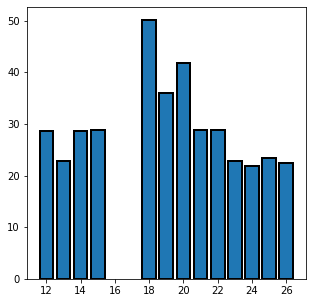

In [111]:
fig, ax = plt.subplots(figsize=(5,5))
tps = set()
group_names = {i:v for  i,v in enumerate(full_df['model_version'].unique())}
group_codes = {v:i for i,v in group_names.items()}
colors = {n:f'C{n}' for n in range(10)}
ordered_names = full_df.sort_values("FID")["model_name"]

for i,t in enumerate(ordered_names):
    score = full_df.loc[i,"FID"]
    group = full_df.loc[12,"model_version"]
    c = colors[group_codes[group]]
    plt.bar(i, score, color=c, edgecolor='k', linewidth=2)
    tps.add(group)

# to adjust
plt.xticks(x, [titles[t] for t in order], rotation='vertical')
legend_elements = [Patch(facecolor=info.colors[name], label=info.group_names[name]) for name in tps]
legend = plt.legend(handles=legend_elements, title='Architecture')
plt.ylabel('Reconstruction FID Score')
plt.title(f'{info.title} Reconstruction Quality')
plt.grid(linestyle='--',axis='y')
plt.tight_layout()

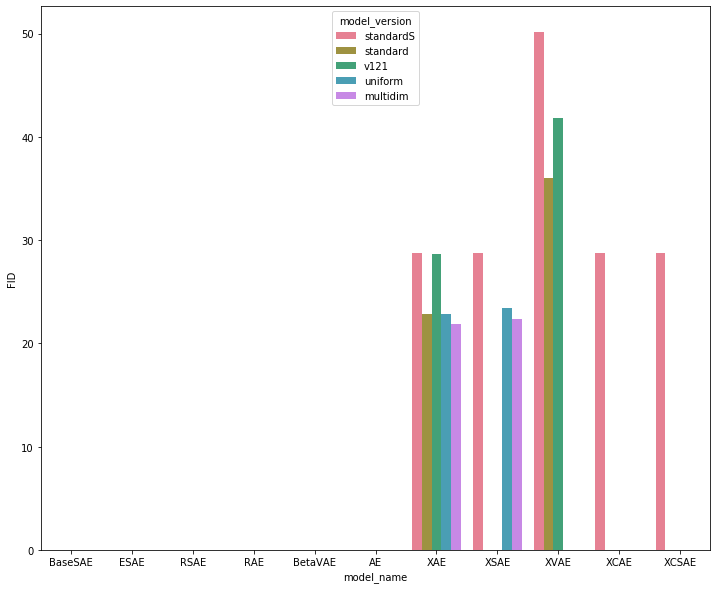

In [55]:
# histogram of all the scores 
fig = plt.figure(figsize=(12,10))
sns.barplot(data=full_df, x="model_name", y='FID', hue="model_version", palette="husl")

In [ ]:
#TODO: adjust plotting for visual datasets

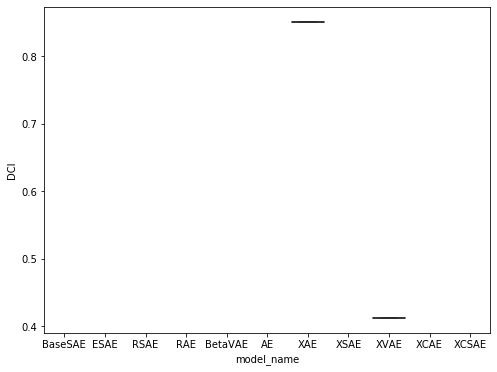

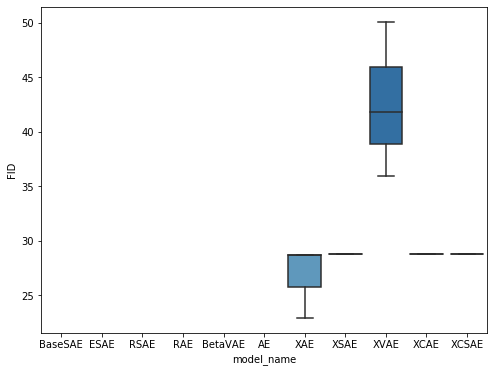

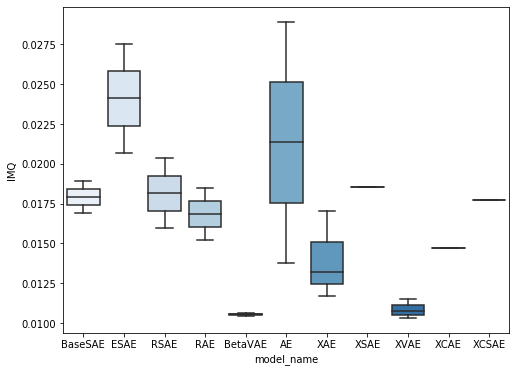

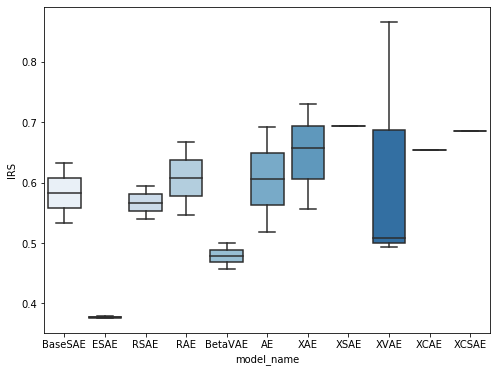

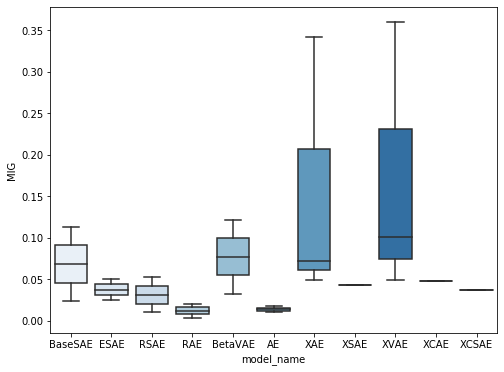

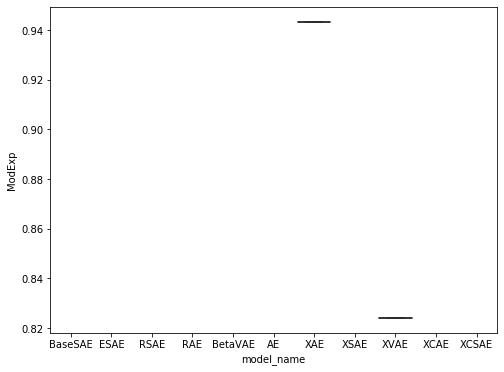

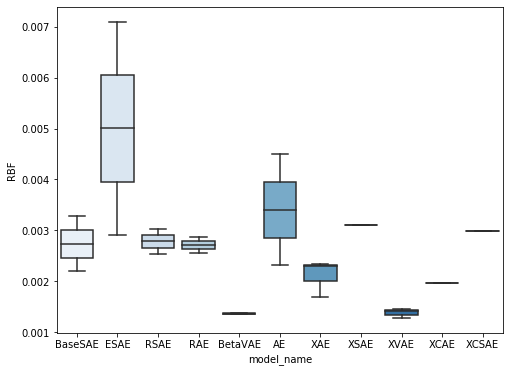

In [19]:
for k in full_df.columns[1:8]: # disentanglement
    fig = plt.figure(figsize=(8,6))
    sns.boxplot(x='model_name',y=k,data=full_df,
                palette="Blues")

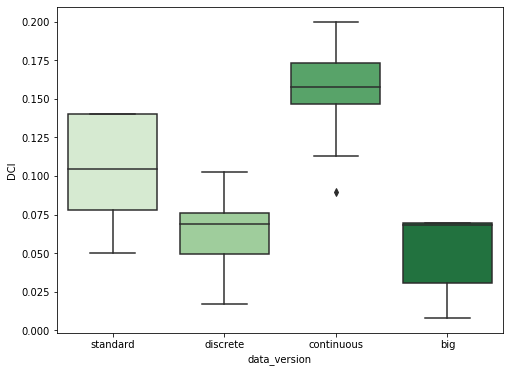

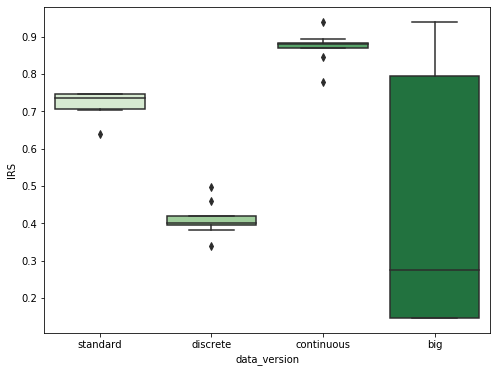

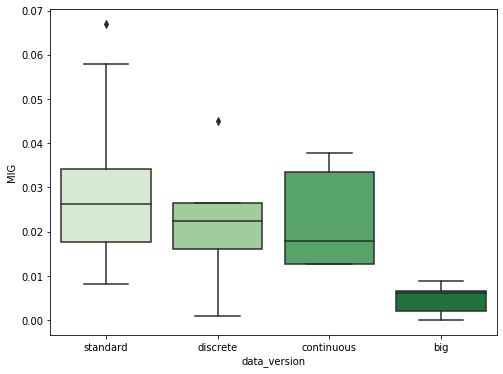

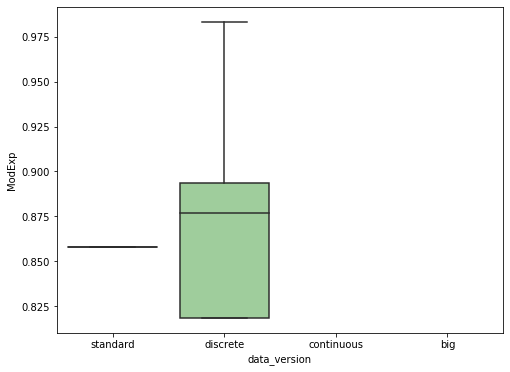

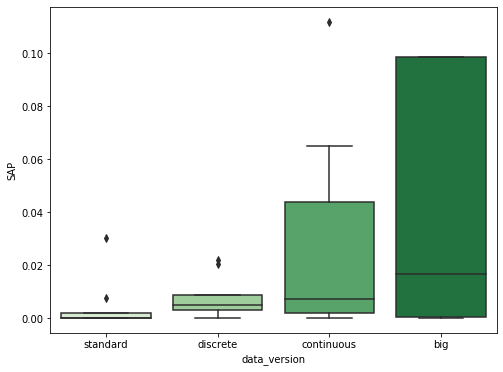

In [59]:
for k in scores_df.columns[3:]: # orthogonality
    fig = plt.figure(figsize=(8,6))
    sns.boxplot(x='data_version',y=k,data=scores_df, palette="Greens")

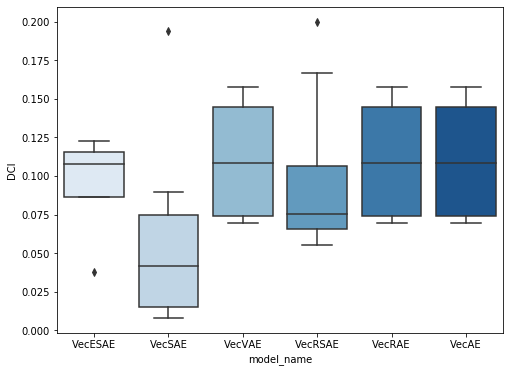

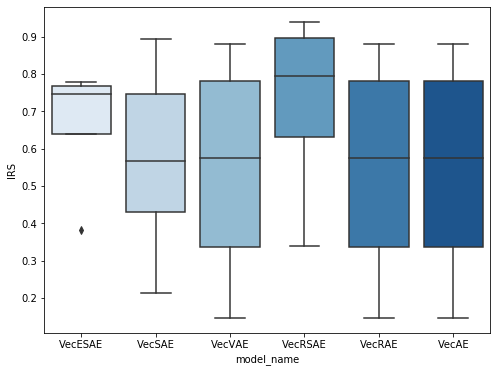

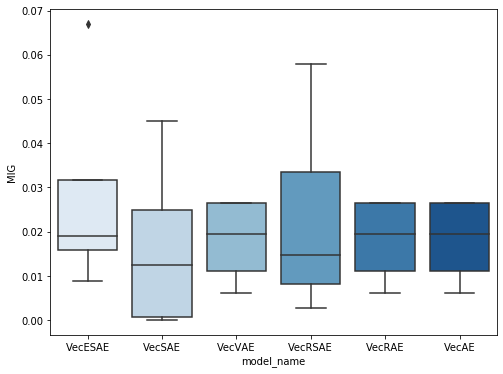

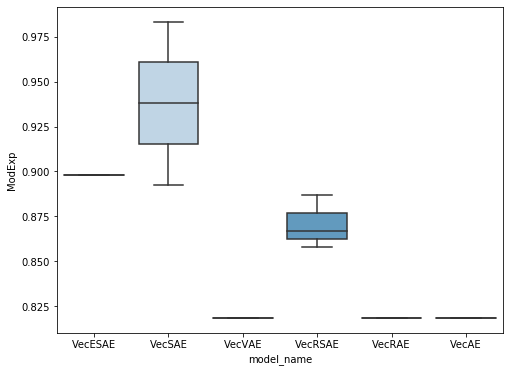

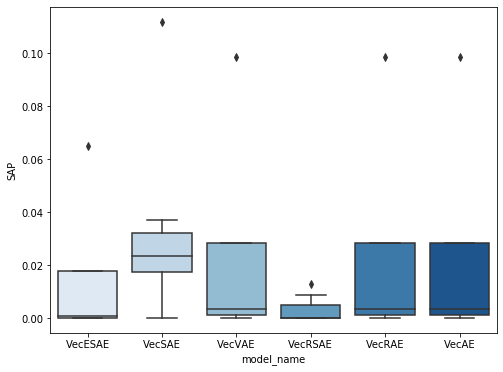

In [47]:
# finally visualising 
for k in scores_df.columns[3:]: # disentanglement
    fig = plt.figure(figsize=(8,6))
    sns.boxplot(x='model_name',y=k,data=scores_df, palette="Blues")

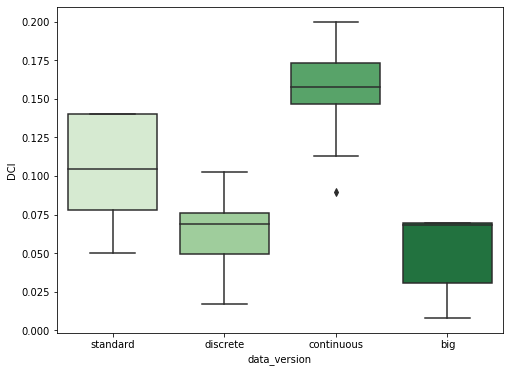

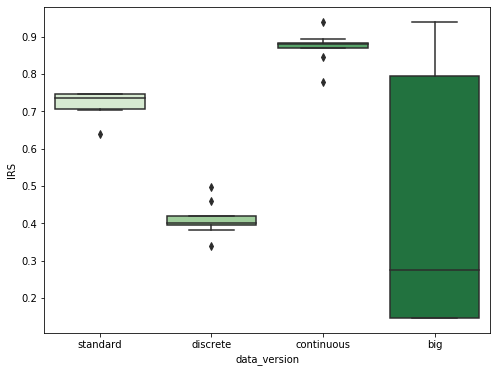

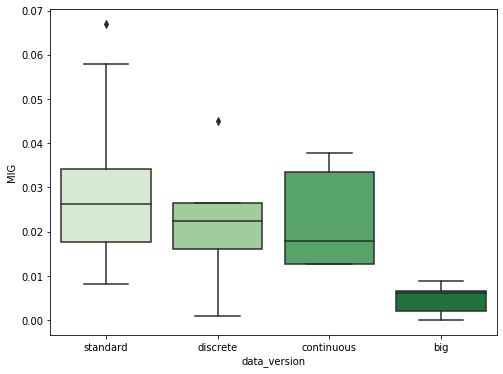

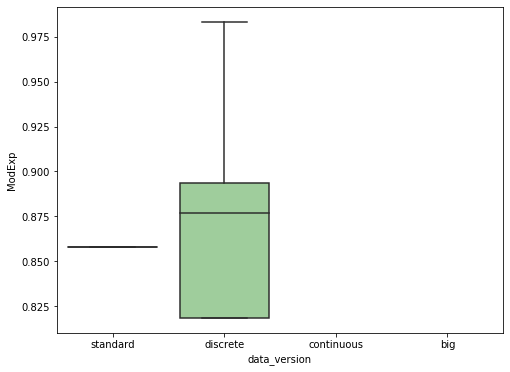

In [57]:
# finally visualising 
for k in scores_df.columns[3:-1]: # disentanglement
    fig = plt.figure(figsize=(8,6))
    sns.boxplot(x='data_version',y=k,data=scores_df, palette="Greens")

# Invariance Scoring

In [65]:
params = {"model_name":"XCAE",
          "model_version":"standardS",
          "data" : "MNIST"}

# load handler
handler = ModelHandler.from_config(**params)
handler.config["logging_params"]["save_dir"] = "./logs"
handler.load_checkpoint('final')

configs/models/XCAE/standardS.yaml
Initialising schedulers Manager...
Causal mode ON
Explicit mode ON
XCAE model hanlder loaded.
Loading selected checkpoint at logs\XCAE\standardS_MNIST\checkpoints/final.ckpt
MODEL SUMMARY
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              Mish-3           [-1, 32, 14, 14]               0
       BatchNorm2d-4           [-1, 32, 14, 14]              64
         ConvBlock-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              Mish-7           [-1, 32, 14, 14]               0
       BatchNorm2d-8           [-1, 32, 14, 14]              64
         ConvBlock-9           [-1, 32, 14, 14]               0
           Conv2d-10           [-1, 32, 14, 14]           9,248
        

Initialising schedulers Manager...
Causal mode ON
Explicit mode ON


In [66]:
params= {
    'intervention_type':'noise',
    'num_interventions':100, 
    'num_samples':200,
    'store':True, 
    'load':True,
    'random_seed':23,
    'num_batches':10,
    'mode':'X',
    'verbose':True}

invariance_matrix = handler.evaluate_invariance(**params)

Scoring model's response map invariance to noise interventions.
Loading invariances matrix


In [67]:
invariance_matrix

tensor([[0.0000, 0.9107, 0.8655, 0.8326, 0.9245, 0.8990],
        [0.7546, 0.0000, 0.6494, 0.6154, 0.8200, 0.7850],
        [0.8661, 0.9007, 0.0000, 0.8311, 0.9209, 0.8737],
        [0.9208, 0.9341, 0.8693, 0.0000, 0.9384, 0.9299],
        [0.8179, 0.8451, 0.7429, 0.7221, 0.0000, 0.8456],
        [0.8366, 0.8195, 0.7422, 0.7470, 0.8680, 0.0000]])

In [68]:
handler.visualiser = ModelVisualiser(handler.model, handler.dataloader.test, **handler.config["vis_params"])
figure_params = {"figsize":(8,6), "nrows":3, "N":100, "markersize":10, "font_scale":10}

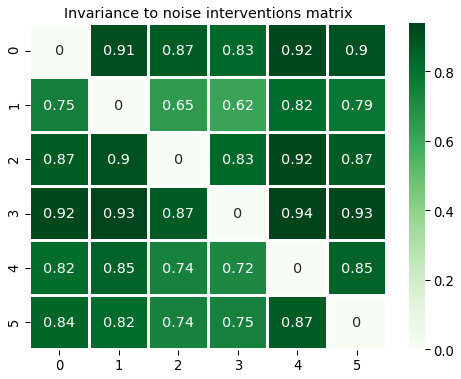

In [69]:
fig = handler.visualiser.plot_heatmap(invariance_matrix.cpu(), 
                                      title="Invariance to noise interventions matrix", 
                                      threshold=0., 
                                      **figure_params)

In [70]:
print(torch.sum(invariance_matrix))

tensor(25.0286)
